### The following notebook demonstrates usage of library

Firstly, proceed all useful imports.

In [1]:
import numpy as np

import torch

from models import AgentA3C, AgentA2C

import gym
import time
import matplotlib.pyplot as plt
%matplotlib inline

And define whether learning will be done on CPU or GPU.

In [2]:
USE_GPU = False and torch.cuda.is_available()

Set random seed for reproducibility:

In [3]:
SEED = 777
np.random.seed(SEED)
torch.manual_seed(SEED)
if USE_GPU:
    torch.cuda.manual_seed(SEED)

And define set of Atari games with different environment:

In [4]:
games = [
    'FrozenLake-v0',
    'CartPole-v0',
    'LunarLander-v2'
]

Then define game and model parameters.

In [5]:
i_game = 0

discount_gamma = 0.99
n_episodes = 10*1000
n_agents = 10

env = gym.make(games[i_game])
envs = [gym.make(games[i_game]) for _ in range(n_agents)]

Lets create agent A2C and let him learn to play chosen game:

In [6]:
agentA2C = AgentA2C(env, gamma=discount_gamma, lr=1e-4, save_returns=True)
if USE_GPU:
    agentA2C = agentA2C.cuda()

In [7]:
start = time.time()
agentA2C.learn(n_episodes, n_steps=10, k_bootstrap=5, verbosity=500)
print('Trained in {} min'.format(round((time.time() - start) / 60, 2)))

episode    500 [act: -0.2115, crt: 57.6915, ent: 2.0275 rew_e: 0.005077], 2.5 ms/ep
episode   1000 [act: -0.7905, crt: 2.1479, ent: 2.0772 rew_e: 0.001703], 2.2 ms/ep
episode   1500 [act: -0.3336, crt: 0.8220, ent: 2.1989 rew_e: 0.003443], 2.1 ms/ep
episode   2000 [act: -0.2686, crt: 0.4950, ent: 2.1631 rew_e: 0.005289], 2.1 ms/ep
episode   2500 [act: -0.2929, crt: 0.2878, ent: 2.4460 rew_e: 0.007031], 2.2 ms/ep
episode   3000 [act: -0.2736, crt: 0.2070, ent: 2.5178 rew_e: 0.015635], 2.2 ms/ep
episode   3500 [act: -0.3471, crt: 0.3144, ent: 2.6941 rew_e: 0.015599], 2.2 ms/ep
episode   4000 [act: -0.4274, crt: 0.3838, ent: 2.8442 rew_e: 0.024340], 2.2 ms/ep
episode   4500 [act: -0.6159, crt: 0.5561, ent: 2.9954 rew_e: 0.033295], 2.2 ms/ep
episode   5000 [act: -0.6991, crt: 0.7157, ent: 3.0551 rew_e: 0.045412], 2.3 ms/ep
episode   5500 [act: -0.6783, crt: 0.7174, ent: 2.8506 rew_e: 0.042356], 2.2 ms/ep
episode   6000 [act: -0.5855, crt: 0.5015, ent: 2.9326 rew_e: 0.033037], 2.2 ms/ep
epi

Do the same actions with agent A3C:

In [8]:
agentA3C = AgentA3C(envs, gamma=discount_gamma, lr=1e-4, save_returns=True)
if USE_GPU:
    agentA3C = agentA3C.cuda()

In [10]:
start = time.time()
agentA3C.learn(n_agents, n_episodes, n_steps=10, k_bootstrap=5, verbosity=500)
print('Trained in {} min'.format(round((time.time() - start) / 60, 2)))

episode    500 [act: 39.7597, crt: 36.0758, ent: 0.1489 rew_e: 0.025249], 10.3 ms/ep
episode   1000 [act: 24.8768, crt: 24.8341, ent: 0.0907 rew_e: 0.027793], 13.1 ms/ep
episode   1500 [act: 20.5710, crt: 19.3856, ent: 0.0784 rew_e: 0.028329], 12.2 ms/ep
episode   2000 [act: 17.2013, crt: 15.6290, ent: 0.0731 rew_e: 0.026387], 13.5 ms/ep
episode   2500 [act: 18.2714, crt: 16.5277, ent: 0.0754 rew_e: 0.034329], 14.7 ms/ep
episode   3000 [act: 18.7764, crt: 17.2411, ent: 0.0751 rew_e: 0.053071], 15.8 ms/ep
episode   3500 [act: 17.4256, crt: 15.9330, ent: 0.0708 rew_e: 0.062121], 14.6 ms/ep
episode   4000 [act: 14.4060, crt: 13.7856, ent: 0.0608 rew_e: 0.077320], 15.9 ms/ep
episode   4500 [act: 11.4899, crt: 10.3682, ent: 0.0519 rew_e: 0.072366], 16.6 ms/ep
episode   5000 [act: 10.0895, crt: 9.4336, ent: 0.0485 rew_e: 0.076761], 17.0 ms/ep
episode   5500 [act: 8.5990, crt: 8.1751, ent: 0.0459 rew_e: 0.089617], 17.4 ms/ep
episode   6000 [act: 8.5338, crt: 8.3666, ent: 0.0464 rew_e: 0.08757

We can see debug information with actor gain, critic loss, entropy and mean obtained reward for bunch of episodes. 

Now lets take a look at graphics of returns by episodes of two trained agents:

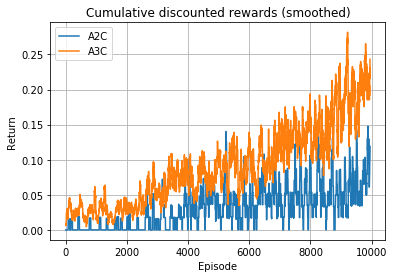

In [11]:
window_size = 50
plt.title('Cumulative discounted rewards (smoothed)')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.grid()
plt.plot(np.convolve(
    agentA2C.returns_over_episodes, np.ones(window_size) / window_size, mode='valid'
), label='A2C')

plt.plot(np.convolve(
    agentA3C.returns_over_episodes, np.ones(window_size) / window_size, mode='valid'
), label='A3C')
plt.legend()
plt.show()

Also we can see trained policy for both agents:

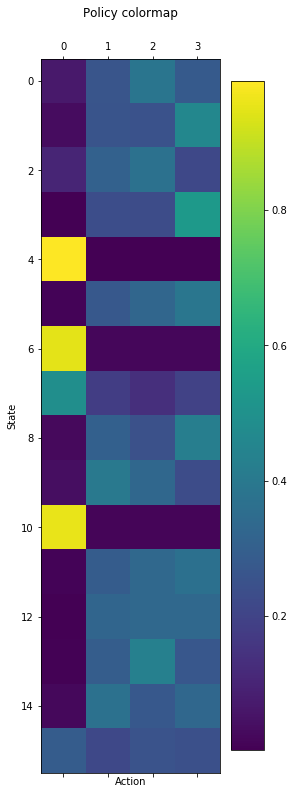

In [12]:
policy = agentA2C.get_policy()
plt.matshow(policy)
plt.title('Policy colormap')
plt.xlabel('Action')
plt.ylabel('State')
plt.colorbar()

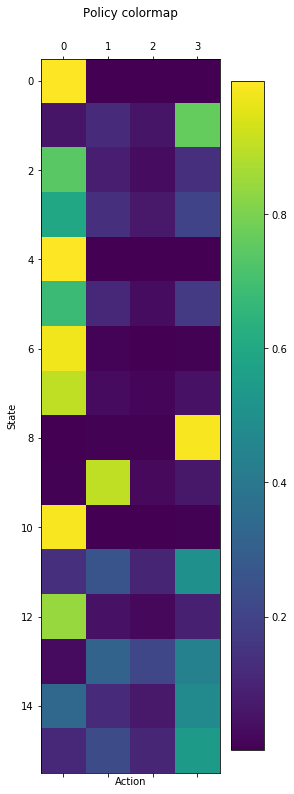

In [13]:
policy = agentA3C.get_policy()
plt.matshow(policy)
plt.title('Policy colormap')
plt.xlabel('Action')
plt.ylabel('State')
plt.colorbar()

You can find more information in source code (commented).